# Milestone 1 Phase 1

## Introduction

Nama  : Fitri Octaviani

Batch : HCK-006

## Objective

Penerbit kartu kredit yang berbasis di Taiwan ingin memprediksi dengan lebih baik kemungkinan orang yang tidak bayar (1) tapi terbaca bayar (0)

## About The Data

Data yang digunakan dalam tugas ini diambil dari BigQuery Google Public Dataset.

Kolom yang akan saya gunakan adalah limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default.

- limit_balance : Jumlah kredit yang diberikan dalam dolar NT
- sex : gender (1=male, 2=female)
- education_level : tingkat pendidikan (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- marital_status : Marital status (1=married, 2=single, 3=others)
- age : umur
- pay_0 : Status pembayaran pada bulan September, 2005 (-1=membayar sebagaimana mestinya, 1=penundaan pembayaran selama satu bulan, 2=penundaan pembayaran selama dua bulan, ... 8=penundaan pembayaran selama delapan bulan, 9=penundaan pembayaran selama sembilan bulan dan di atas)
- pay_2 : Status pembayaran pada bulan Agustus 2005 (skala sama seperti di atas)
- pay_3 : Status pembayaran pada Juli 2005 (skala sama seperti di atas)
- pay_4 : Status pembayaran pada bulan Juni 2005 (skala sama seperti di atas)
- pay_5 : Status pembayaran pada bulan Mei 2005 (skala sama seperti di atas)
- pay_6 :Status pembayaran pada bulan April 2005 (skala sama seperti di atas)
- bill_amt_1: Jumlah laporan tagihan pada bulan September 2005 (Dolar NT)
- bill_amt_2: Jumlah tagihan pada bulan Agustus 2005 (Dolar NT)
- bill_amt_3: Jumlah tagihan pada bulan Juli 2005 (Dolar NT)
- bill_amt_4: Jumlah tagihan pada bulan Juni 2005 (Dolar NT)
- bill_amt_5: Jumlah tagihan bulan Mei 2005 (Dolar NT)
- bill_amt_6: Jumlah laporan tagihan pada bulan April 2005 (Dolar NT)
- pay_amt_1: Jumlah pembayaran sebelumnya pada bulan September 2005 (Dolar NT)
- pay_amt_2: Jumlah pembayaran sebelumnya pada bulan Agustus 2005 (Dolar NT)
- pay_amt_3: Jumlah pembayaran sebelumnya pada bulan Juli 2005 (Dolar NT)
- pay_amt_4: Jumlah pembayaran sebelumnya pada bulan Juni 2005 (Dolar NT)
- pay_amt_5: Jumlah pembayaran sebelumnya pada bulan Mei 2005 (Dolar NT)
- pay_amt_6: Jumlah pembayaran sebelumnya pada bulan April 2005 (Dolar NT)
- default_payment_next_month: Pembayaran default (1=tidak bayar, 0=bayar)

## SQL QUERY



```
SELECT limit_balance,
        CAST(sex AS INT64) AS sex,
        CAST (education_level AS INT64) AS education_level,
        CAST (marital_status AS INT64) AS marital_status,
        age, pay_0, pay_2, pay_3, pay_4,
        CAST (pay_5 AS FLOAT64) AS pay_5,
        CAST (pay_6 AS FLOAT64) AS pay_6,
        bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4,
        bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2,
        pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6,
        CAST (default_payment_next_month AS INT64) AS  default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default`
LIMIT 11994
```



# Import Library

In [1]:
!pip install feature_engine

In [2]:
!pip install phik

In [3]:
# import library yang dibutuhkan
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV, StratifiedKFold, train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from feature_engine.outliers import Winsorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import phik
from phik import resources, report
from phik.report import plot_correlation_matrix
import pandas as pd
import numpy  as np
import seaborn as sns; sns.set()
import joblib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.utils import resample,shuffle
from sklearn.ensemble import GradientBoostingClassifier
import warnings

warnings.filterwarnings("ignore")

# Data Loading

In [4]:
df = pd.read_csv('/content/sample_data/h8dsft_P1M1_Fitri_Octaviani.csv')

In [5]:
# menampilkan data teratas
df.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
5,300000.0,2,4,2,32.0,0.0,0.0,0.0,0.0,0.0,...,65150.0,-450.0,700.0,15235.0,1491.0,1303.0,0.0,2000.0,1400.0,0
6,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
7,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,...,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
8,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,...,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
9,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,...,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0


In [6]:
# menampilkan data terbawah
df.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0
2956,100000.0,1,3,1,40.0,0.0,0.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,2000.0,2377.0,40000.0,0.0,0.0,0.0,0
2957,30000.0,2,3,1,48.0,1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0
2958,80000.0,2,3,1,39.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,5000.0,5000.0,5000.0,0.0,5000.0,5000.0,470.0,0
2959,20000.0,1,3,2,26.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,1560.0,0.0,0.0,0.0,0.0,0.0,0
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0
2964,290000.0,2,2,1,39.0,1.0,-2.0,-2.0,-2.0,-2.0,...,3184.0,390.0,390.0,10000.0,800.0,3184.0,390.0,390.0,6617.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

Dataset ini berisi 2965 dari 24. Untuk type data juga datanya sudah sesuai, yaitu numerikal semua.

In [8]:
# menampilkan missing value
df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

Tidak adanya missing value dari 24 kolom tersebut.

In [9]:
# cek duplikat data
df.duplicated().sum()

1

Terdapat 1 entri data duplikat

In [10]:
# drop data duplikat
df.drop_duplicates(inplace=True)

In [11]:
# cek jumlah duplikat data
df.duplicated().sum()

0

Data duplikat sudah tidak ada

In [12]:
# melihat list kolom yang memiliki nilai sebagai kategori
cat_cols = list(df.select_dtypes(include='object'))
cat_cols

[]

Tidak adanya kolom yang bernilai kategorikal

In [13]:
# melihat list kolom yang memiliki nilai sebagai numerikal
num_cols = df.describe().columns.tolist()
num_cols

['limit_balance',
 'sex',
 'education_level',
 'marital_status',
 'age',
 'pay_0',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'bill_amt_1',
 'bill_amt_2',
 'bill_amt_3',
 'bill_amt_4',
 'bill_amt_5',
 'bill_amt_6',
 'pay_amt_1',
 'pay_amt_2',
 'pay_amt_3',
 'pay_amt_4',
 'pay_amt_5',
 'pay_amt_6',
 'default_payment_next_month']

In [14]:
# numeric overview
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2964.0,163356.950067,125049.701016,10000.0,50000.00,140000.0,230000.00,800000.0
sex,2964.0,1.607625,0.488362,1.0,1.00,2.0,2.00,2.0
education_level,2964.0,1.849865,0.778159,0.0,1.00,2.0,2.00,6.0
marital_status,2964.0,1.560054,0.522304,0.0,1.00,2.0,2.00,3.0
age,2964.0,35.193657,9.110949,21.0,28.00,34.0,41.00,69.0
pay_0,2964.0,0.004723,1.114434,-2.0,-1.00,0.0,0.00,8.0
pay_2,2964.0,-0.121795,1.180479,-2.0,-1.00,0.0,0.00,7.0
pay_3,2964.0,-0.141026,1.183337,-2.0,-1.00,0.0,0.00,7.0
pay_4,2964.0,-0.184548,1.178049,-2.0,-1.00,0.0,0.00,8.0
pay_5,2964.0,-0.224696,1.158739,-2.0,-1.00,0.0,0.00,7.0


In [15]:
# numerical overview
for i in num_cols:
    print('Column: ',i)
    print('Total unique labels: ', df[i].nunique())
    print('-' * 30)

Column:  limit_balance
Total unique labels:  59
------------------------------
Column:  sex
Total unique labels:  2
------------------------------
Column:  education_level
Total unique labels:  7
------------------------------
Column:  marital_status
Total unique labels:  4
------------------------------
Column:  age
Total unique labels:  49
------------------------------
Column:  pay_0
Total unique labels:  11
------------------------------
Column:  pay_2
Total unique labels:  10
------------------------------
Column:  pay_3
Total unique labels:  9
------------------------------
Column:  pay_4
Total unique labels:  10
------------------------------
Column:  pay_5
Total unique labels:  9
------------------------------
Column:  pay_6
Total unique labels:  8
------------------------------
Column:  bill_amt_1
Total unique labels:  2643
------------------------------
Column:  bill_amt_2
Total unique labels:  2592
------------------------------
Column:  bill_amt_3
Total unique labels:  2549

In [16]:
df.shape

(2964, 24)

# Exploratory Data Analysis

In [17]:
df.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0


Dataset terdiri dari kolom numerikal dan targetnya berupa data numerikal yang sudah di encode. Kategori target klasifikasi adalah apakah orang yang tidak bayar tapi terbaca bayar. Menurut dataset, nilai 0 artinya bayar (positif) dan nilai 1 artinya tidak bayar (negatif).

In [18]:
num_col = df.select_dtypes('number').columns.to_list()
len(num_col)

24

Terdapat 24 kolom dataset, yang mana 23nya tersebut adalah feature dan 1 kolom tersebut adalah target yang dengan nama default_payment_next_month

In [19]:
df.default_payment_next_month.value_counts()

0    2329
1     635
Name: default_payment_next_month, dtype: int64

Dalam data target memiliki 2 unique value, dimana 0 berarti 'bayar' dan 1 berarti 'tidak bayar'

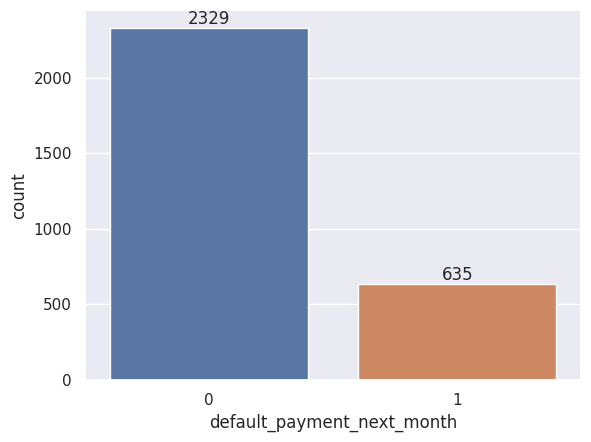

In [20]:
# melihat total target
ax = sns.countplot(x=df.default_payment_next_month, data=df)
ax.bar_label(ax.containers[0])
plt.show()

Terlihat pada kolom yang akan menjadi target memiliki class imbalance, dimana target yang berlabel 0 memiliki jumlah 2329, sedangkan untuk target yang berlabel 1 memiliki jumlah 635.

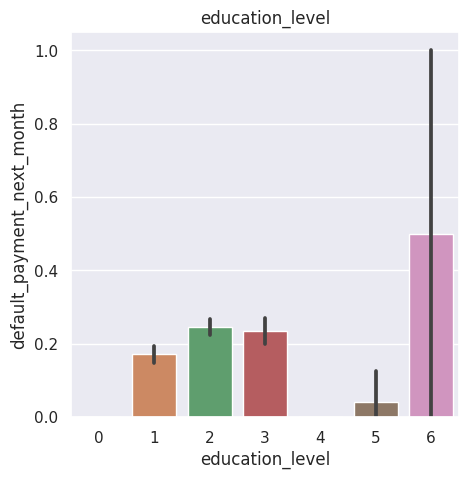

In [21]:
#see hours_per_week based default_payment_next_month
plt.figure(figsize=(5, 5))
sns.barplot(x='education_level', y='default_payment_next_month', data=df)
plt.title('education_level')
plt.show()

Dari visualisasi barplot, dapat dilihat bahwa terdapat perbedaan tingkat default_payment_next_month antara tingkat pendidikan. Ini menunjukkan bahwa tingkat pendidikan dapat mempengaruhi kecenderungan seseorang untuk melakukan pembayaran. Beberapa tingkat pendidikan memiliki tingkat default_payment_next_month yang lebih tinggi seperti dalam kategori 6, sedangkan yang lain mungkin memiliki tingkat yang lebih rendah. Informasi ini dapat digunakan oleh perusahaan kartu kredit atau lembaga keuangan untuk memahami risiko potensial dalam memberikan kredit kepada individu dengan tingkat pendidikan tertentu.

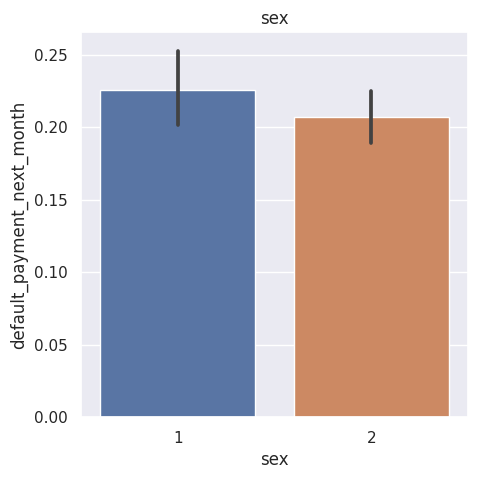

In [22]:
#see sex based default_payment_next_month
plt.figure(figsize=(5, 5))
sns.barplot(x='sex', y='default_payment_next_month', data=df)
plt.title('sex')
plt.show()

Diagram tersebut memberikan perbandingan persentase default_payment_next_month dengan jenis kelamin. Dalam hal ini terdapat perbedaan yang tidak signifikan antara laki-laki dan perempuan dalam hal kecenderungan default_payment_next_month. Dengan hal tersebut, maka faktor jenis kelamin tidak mempengaruhi default_payment_next_month.

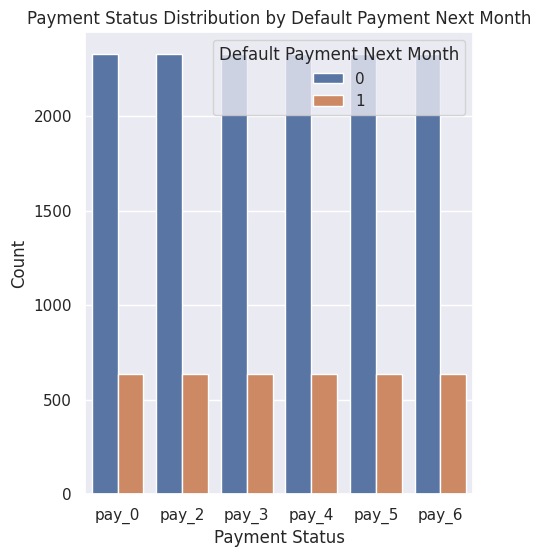

In [23]:
#see pay_column based default_payment_next_month
pay_columns = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
target_column = 'default_payment_next_month'
pay_target_df = df[pay_columns + [target_column]]

# Melt the dataframe to long format for visualization
pay_target_melted = pay_target_df.melt(id_vars=target_column, value_vars=pay_columns,
                                       var_name='Payment Status', value_name='Count')

# Plotting the bar chart
plt.figure(figsize=(5, 6))
sns.countplot(data=pay_target_melted, x='Payment Status', hue=target_column)
plt.xlabel('Payment Status')
plt.ylabel('Count')
plt.title('Payment Status Distribution by Default Payment Next Month')
plt.legend(title='Default Payment Next Month', loc='upper right')
plt.show()

Melalui visualisasi ini, diagram menampilkan distribusi status permbayaran dalam kolom payment status (pay_n). Dalam hal ini masing-masing status pembayaran sering terjadi dengan kategori 0.

# Feature Engineering

interval columns not set, guessing: ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default_payment_next_month']


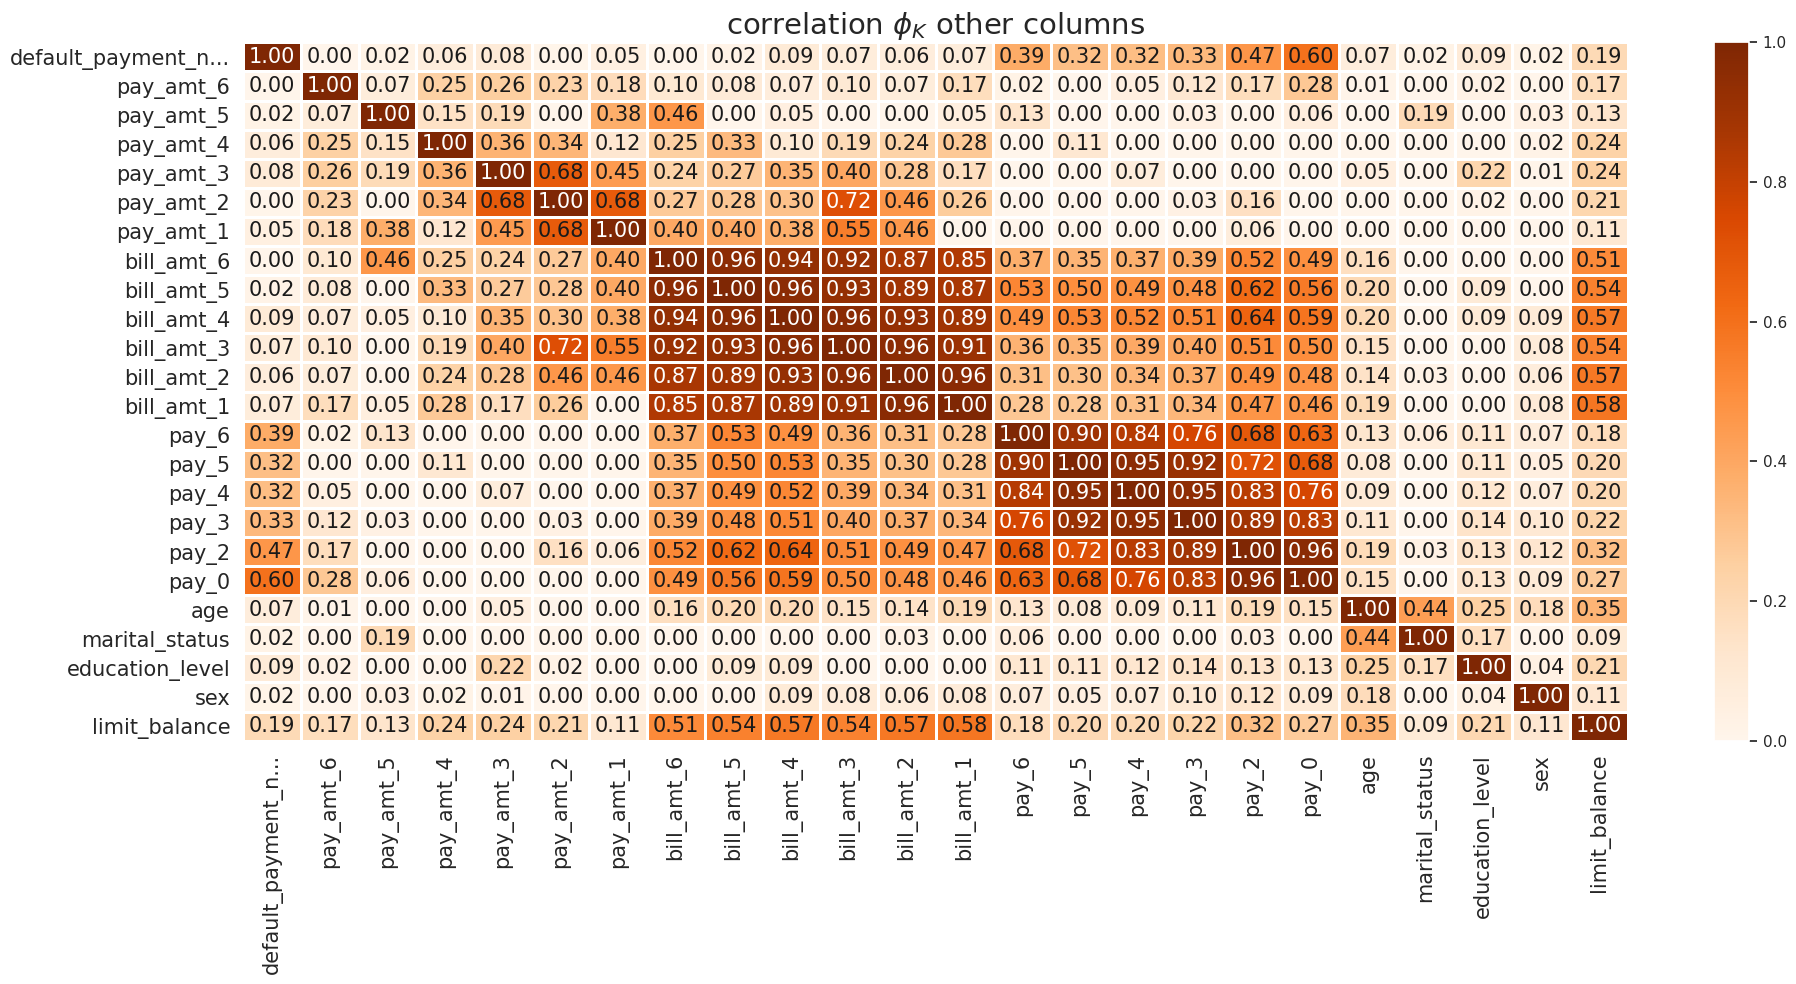

In [24]:
# get the phi_k correlation matrix between all variables
phik_matrix = df.phik_matrix()
plot_correlation_matrix(phik_matrix.values,
                        x_labels=phik_matrix.columns,
                        y_labels=phik_matrix.index,
                        vmin=0, vmax=1, color_map="Oranges",
                        title=r"correlation $\phi_K$ other columns",
                        fontsize_factor=1.5,
                        figsize=(20,10))
plt.tight_layout()

In [25]:
# cek korelasi yang memiliki signifikansi terhadap default_payment_next_month
df.phik_matrix().default_payment_next_month.sort_values(ascending=False)

interval columns not set, guessing: ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default_payment_next_month']


default_payment_next_month    1.000000
pay_0                         0.596572
pay_2                         0.468335
pay_6                         0.386559
pay_3                         0.334726
pay_4                         0.318688
pay_5                         0.315415
limit_balance                 0.191907
bill_amt_4                    0.087360
education_level               0.085359
pay_amt_3                     0.083774
bill_amt_1                    0.073974
bill_amt_3                    0.073073
age                           0.067038
bill_amt_2                    0.064086
pay_amt_4                     0.062588
pay_amt_1                     0.046866
pay_amt_5                     0.022282
marital_status                0.020055
bill_amt_5                    0.019495
sex                           0.015281
pay_amt_2                     0.004992
bill_amt_6                    0.000000
pay_amt_6                     0.000000
Name: default_payment_next_month, dtype: float64

**Feature Selection**

Dari metode phik diatas, nilai threshold yang saya ambil adalah 0.1. Sehingga untuk kolom yang memiliki nilai korelasi terhadap target dibawah 0.1 akan di drop. Dari heatmap diatas, nilai yang melebihi threshold atau yang paling berkorelasi dengan default_paymnet_next_month adalah pay_1 ~ pay_6 dan limit_balance. Jadi saya akan menggunakan fitur tersebut untuk model saya.

In [26]:
# drop kolom yang korelasinya rendah terhadap target
df.drop(columns = ['pay_amt_6', 'bill_amt_6', 'pay_amt_2', 'sex','bill_amt_5', 'marital_status', 'pay_amt_5', 'pay_amt_1',
                    'pay_amt_4', 'bill_amt_2', 'age', 'bill_amt_3', 'bill_amt_1', 'pay_amt_3', 'education_level', 'bill_amt_4'], inplace=True)

In [27]:
#object column
obj_col = df.select_dtypes(include='object').columns.tolist()
obj_col

[]

In [28]:
#numeric column
num_col = df.select_dtypes(exclude='object').columns.tolist()
num_col

['limit_balance',
 'pay_0',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'default_payment_next_month']

## Train Test Split

In [29]:
# split antara feature dan target
X = df.drop('default_payment_next_month', axis=1)
y = df['default_payment_next_month']

In [30]:
# split antara train dan test
df_train, df_test = train_test_split(df, stratify=y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

print('train size: ', df_train.shape)
print('test size: ', df_test.shape)

train size:  (2074, 8)
test size:  (890, 8)


In [31]:
# menampilkan 5 data train teratas
df_train.head(5)

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
2039,80000.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,0
656,110000.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1738,210000.0,-1.0,0.0,0.0,0.0,2.0,-1.0,0
349,50000.0,2.0,2.0,0.0,0.0,0.0,0.0,1
1470,80000.0,0.0,0.0,2.0,0.0,0.0,0.0,0


In [32]:
# menampilkan 5 data test teratas
df_test.head()

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
2065,100000.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0
2618,80000.0,-2.0,-2.0,-2.0,-2.0,-2.0,-1.0,0
1037,70000.0,2.0,0.0,0.0,0.0,0.0,0.0,1
2722,30000.0,0.0,0.0,0.0,-2.0,-2.0,-2.0,0
1562,360000.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,0


In [33]:
df

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
0,80000.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,20000.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,260000.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,150000.0,0.0,0.0,0.0,-1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
2960,80000.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,0
2961,50000.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,1
2962,450000.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,1
2963,50000.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0


## Handling Outlier

Saya akan melakukan outlier handling terhadap fitur yang telah saya pilih, namun sebagaimana pada dataset yang tertera, fitur pay_n merupakan representasi data kategorikal yang telah di encode ke bentuk numerikal. Oleh karena itu, saya akan melakukan capping pada kolom yang memiliki outlier.

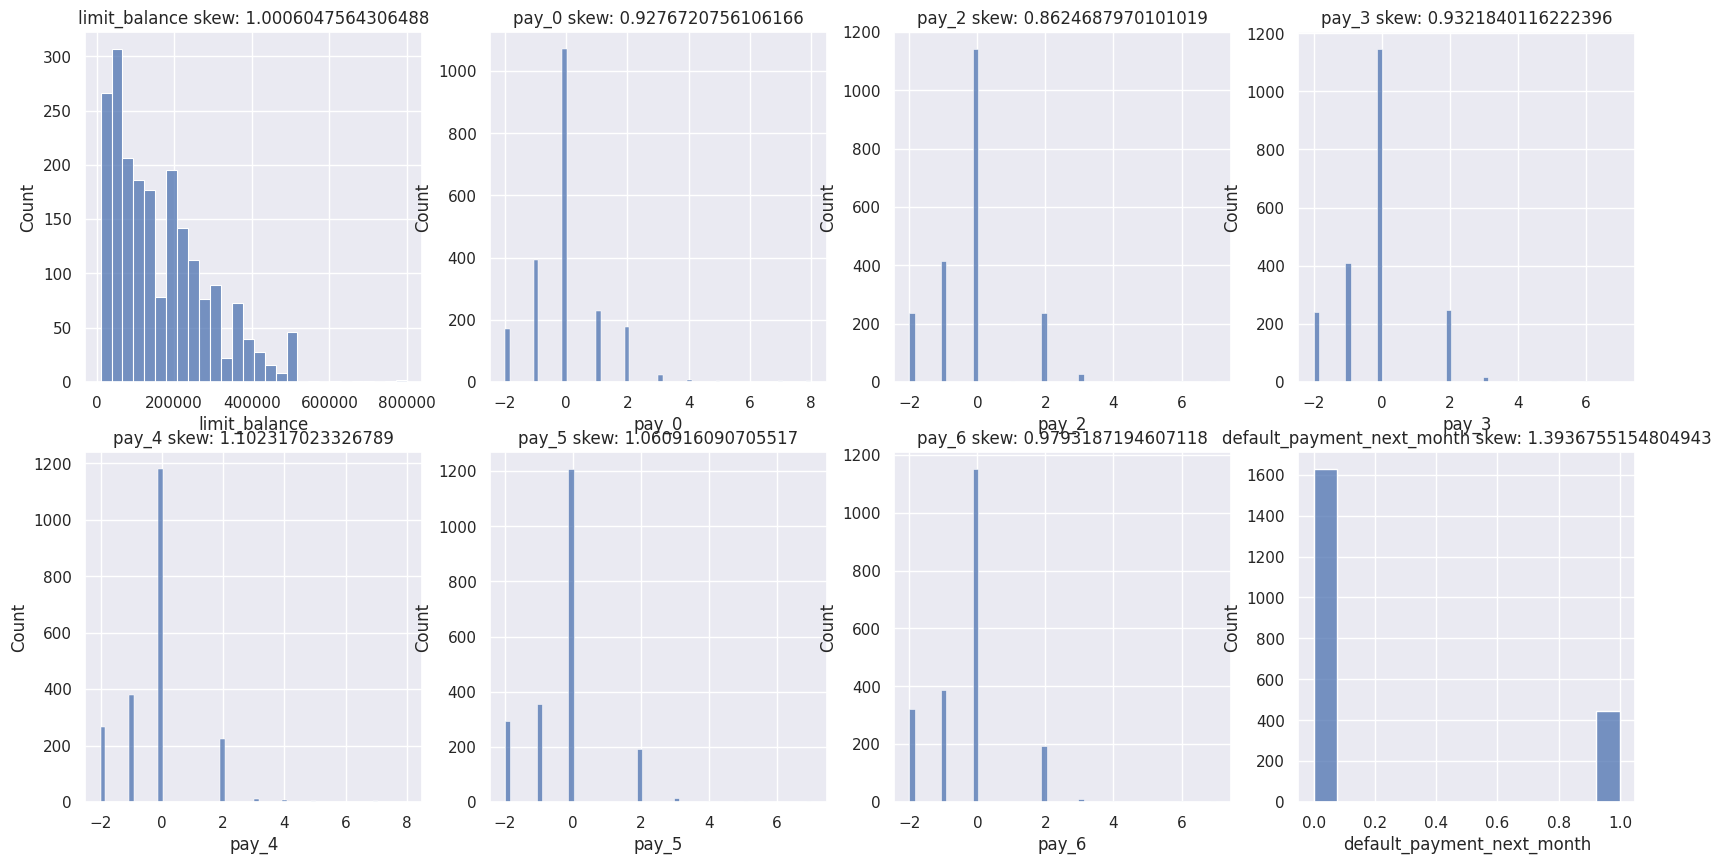

In [34]:
# fungsi untuk membuat histogram skew dari suatu fitur
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=[20,10])
ax = ax.flatten()

for idx, col in enumerate(num_col):
    sns.histplot(df_train[col], ax=ax[idx])
    ax[idx].set_title(f'{num_col[idx]} skew: {df[col].skew()}')

Sebaran data dikatakan normal ketika memiliki nilai skewness (skew) yang mendekati atau sekitar nol. Skewness mengukur asimetri distribusi data. Jika skewness bernilai nol, maka distribusi data dianggap simetris. Untuk sebaran data pay_n terdapat kemiringan sedikit namun secara umum masih tergolong normal. Untuk limit_balance secara umum terlihat sangat miting dengan kurtosis yang sangat runcing.

In [35]:
# fungsi untuk membuat histogram dan boxplot dari suatu fitur
def plot_dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))

    # histogram
    sns.histplot(df[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()

    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")

    plt.show()

    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif df[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif df[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

In [36]:
df_col = df_train[num_col].columns.tolist()
df_col

['limit_balance',
 'pay_0',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'default_payment_next_month']

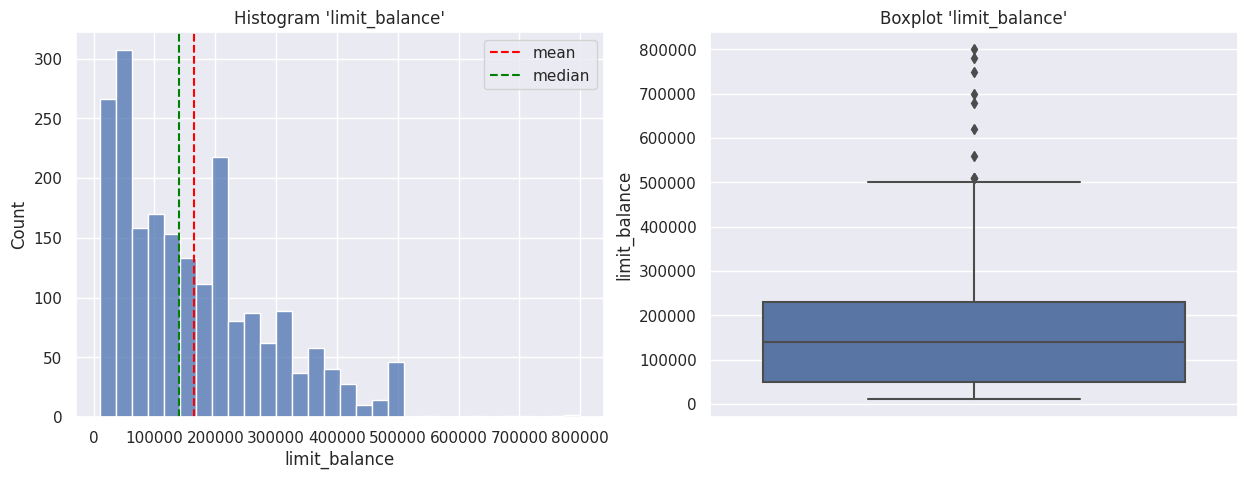

limit_balance Kurtosis: 0.9267852416352791
limit_balance Skewness: 1.022010049001373
Columns 'limit_balance' right skewed


In [37]:
# skew dan boxplot dari limit_balance
plot_dist(df_train, df_col[0])

In [38]:
# outlier detection in limit_balance
Q1 = df_train['limit_balance'].quantile(.25)
Q3 = df_train['limit_balance'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (3*IQR)
lower = Q1 - (3*IQR)

outlier = df_train[(df_train['limit_balance'] <= lower) | (df_train['limit_balance'] >= upper)]

print('percentage: ', len(outlier)/df.shape[0] * 100, '%')
print('upper: ', upper)
print('lower: ', lower)

percentage:  0.06747638326585695 %
upper:  770000.0
lower:  -490000.0


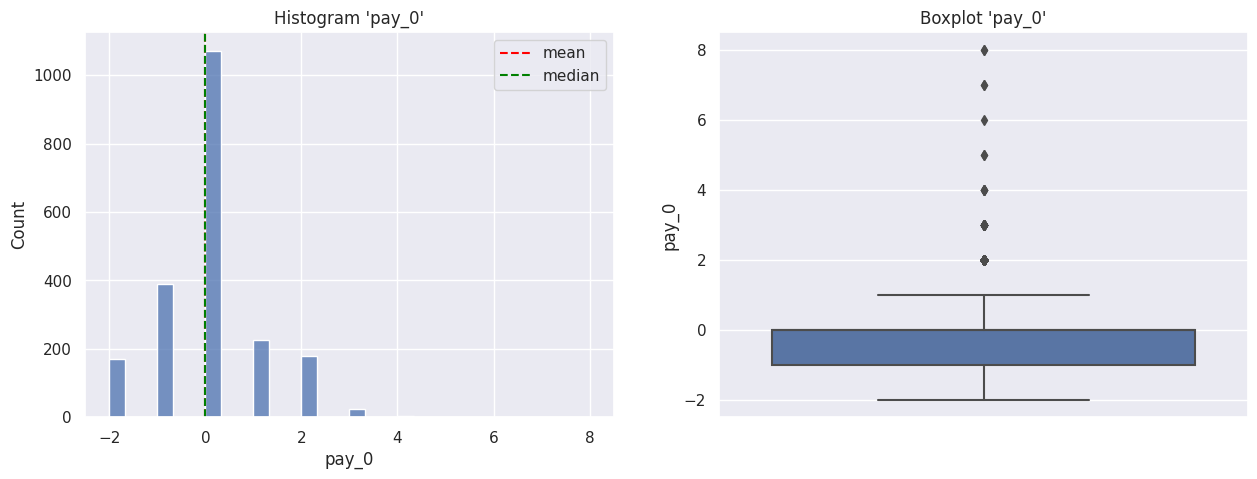

pay_0 Kurtosis: 4.600351919800598
pay_0 Skewness: 1.0460809138868725
Columns 'pay_0' right skewed


In [39]:
# skew dan boxplot dari pay_0
plot_dist(df_train, df_col[1])

In [40]:
# outlier detection in pay_0
Q1 = df_train['pay_0'].quantile(.25)
Q3 = df_train['pay_0'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (3*IQR)
lower = Q1 - (3*IQR)

outlier = df_train[(df_train['pay_0'] <= lower) | (df_train['pay_0'] >= upper)]

print('percentage: ', len(outlier)/df.shape[0] * 100, '%')
print('upper: ', upper)
print('lower: ', lower)

percentage:  1.1808367071524968 %
upper:  3.0
lower:  -4.0


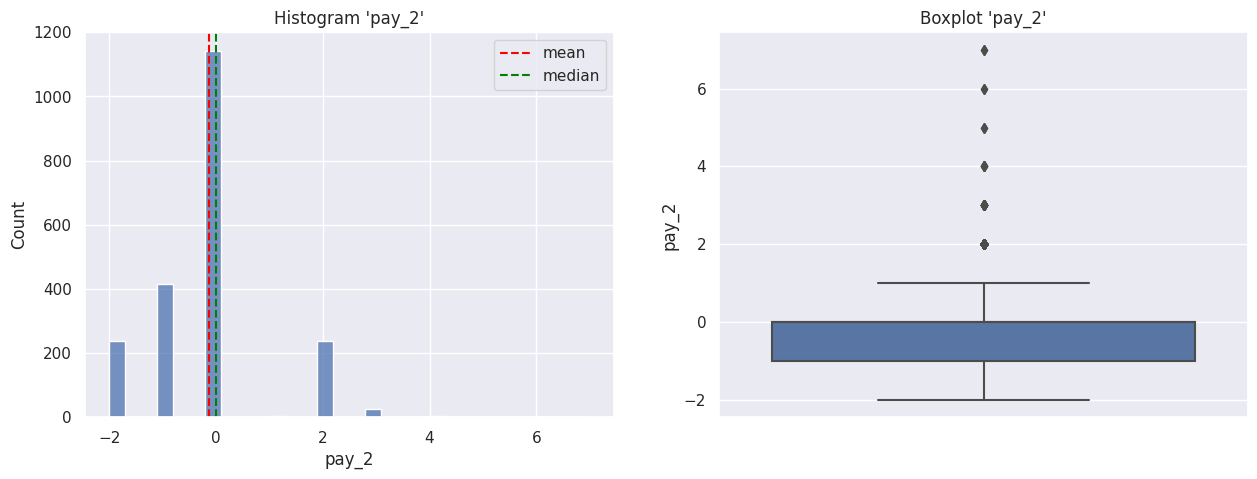

pay_2 Kurtosis: 2.6045522281606015
pay_2 Skewness: 0.9488846075993004
Columns 'pay_2' right skewed


In [41]:
# skew dan boxplot dari pay_2
plot_dist(df_train, df_col[2])

In [42]:
# outlier detection in pay_2
# gaussian
upper = df_train['pay_2'].mean() + (3*df_train['pay_2'].std())
lower = df_train['pay_2'].mean() - (3*df_train['pay_2'].std())

outlier = df_train[(df_train['pay_2'] <= lower) | (df_train['pay_2'] >= upper)]

print('percentage pay_2: ', len(outlier)/df.shape[0] * 100, '%')

percentage pay_2:  0.37112010796221323 %


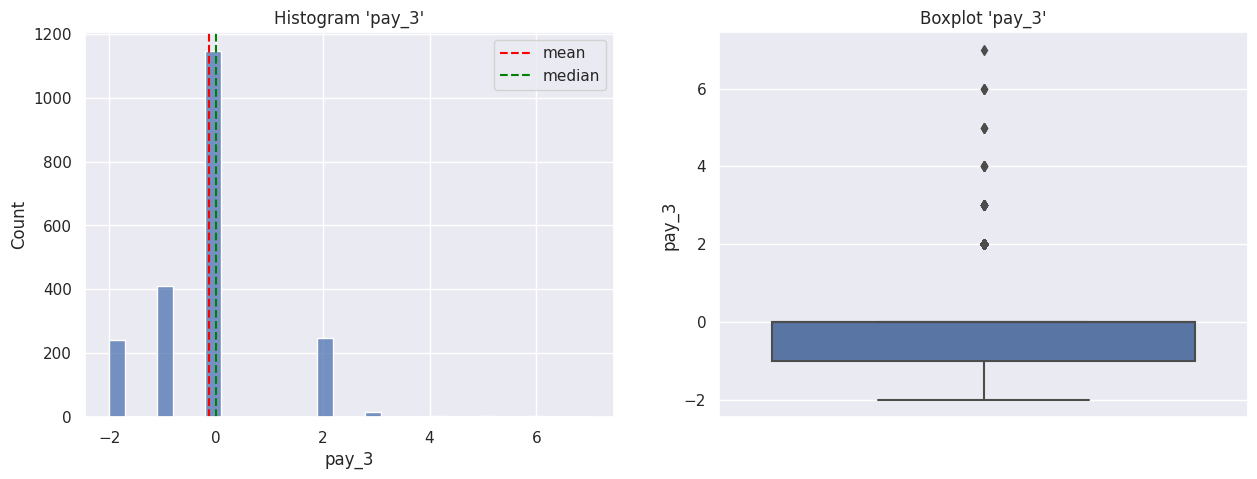

pay_3 Kurtosis: 2.4568708043581253
pay_3 Skewness: 0.9119427703900361
Columns 'pay_3' right skewed


In [43]:
# skew dan boxplot dari pay_3
plot_dist(df_train, df_col[3])

In [44]:
# outlier detection in pay_3
# gaussian
upper = df_train['pay_3'].mean() + (3*df_train['pay_3'].std())
lower = df_train['pay_3'].mean() - (3*df_train['pay_3'].std())

outlier = df_train[(df_train['pay_3'] <= lower) | (df_train['pay_3'] >= upper)]

print('percentage pay_3: ', len(outlier)/df.shape[0] * 100, '%')

percentage pay_3:  0.4048582995951417 %


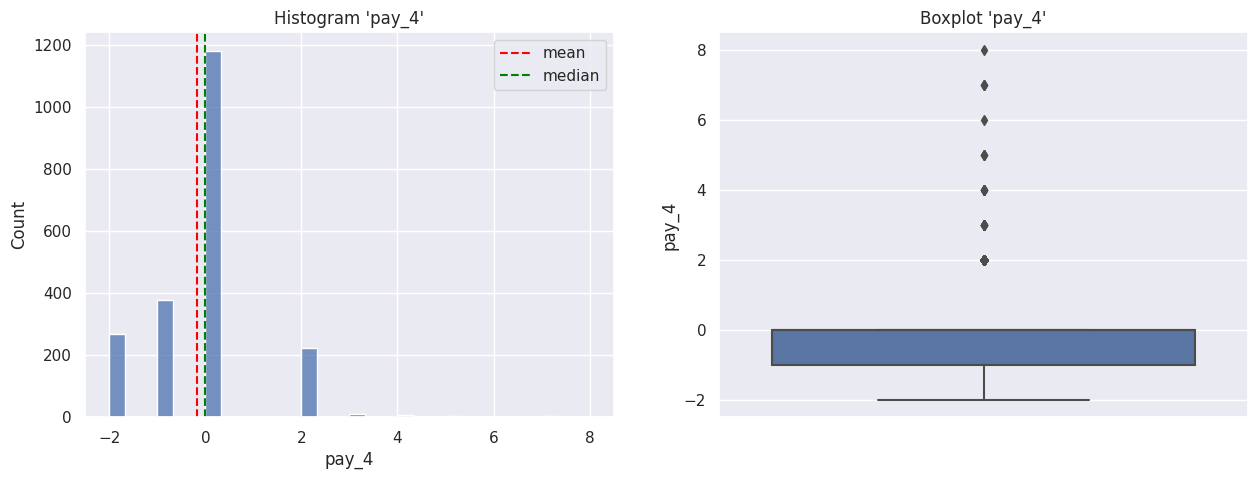

pay_4 Kurtosis: 4.246840956462231
pay_4 Skewness: 1.0924287632641314
Columns 'pay_4' right skewed


In [45]:
# skew dan boxplot dari pay_4
plot_dist(df_train, df_col[4])

In [46]:
# outlier detection in pay_4
Q1 = df_train['pay_4'].quantile(.25)
Q3 = df_train['pay_4'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (3*IQR)
lower = Q1 - (3*IQR)

outlier = df_train[(df_train['pay_4'] <= lower) | (df_train['pay_4'] >= upper)]

print('percentage: ', len(outlier)/df.shape[0] * 100, '%')
print('upper: ', upper)
print('lower: ', lower)

percentage:  0.7759784075573549 %
upper:  3.0
lower:  -4.0


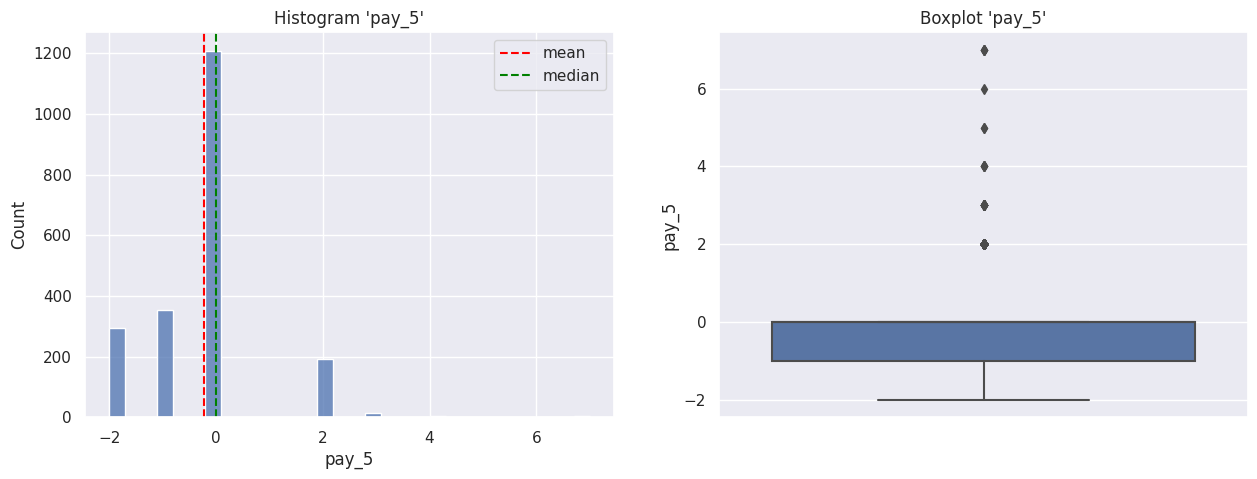

pay_5 Kurtosis: 4.116833400547291
pay_5 Skewness: 1.019856368795649
Columns 'pay_5' right skewed


In [47]:
# skew dan boxplot dari pay_5
plot_dist(df_train, df_col[5])

In [48]:
# outlier detection in pay_5
Q1 = df_train['pay_5'].quantile(.25)
Q3 = df_train['pay_5'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (3*IQR)
lower = Q1 - (3*IQR)

outlier = df_train[(df_train['pay_5'] <= lower) | (df_train['pay_5'] >= upper)]

print('percentage: ', len(outlier)/df.shape[0] * 100, '%')
print('upper: ', upper)
print('lower: ', lower)

percentage:  0.8434547908232118 %
upper:  3.0
lower:  -4.0


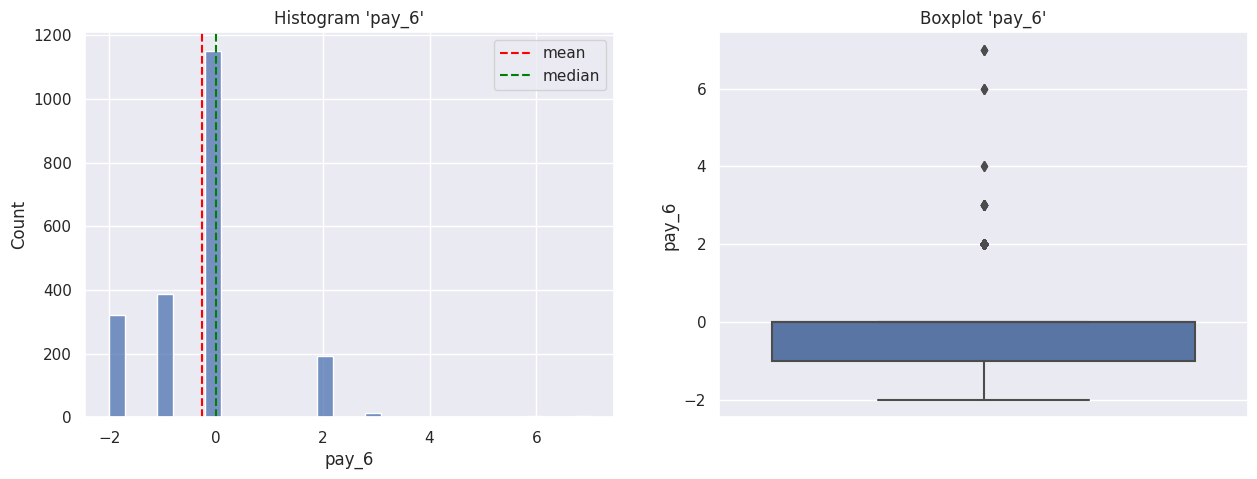

pay_6 Kurtosis: 3.6679140749167454
pay_6 Skewness: 0.9614104320019271
Columns 'pay_6' right skewed


In [49]:
# skew dan boxplot dari pay_6
plot_dist(df_train, df_col[6])

In [50]:
# outlier detection in pay_6
# gaussian
upper = df_train['pay_6'].mean() + (3*df_train['pay_6'].std())
lower = df_train['pay_6'].mean() - (3*df_train['pay_6'].std())

outlier = df_train[(df_train['pay_6'] <= lower) | (df_train['pay_6'] >= upper)]

print('percentage pay_6: ', len(outlier)/df.shape[0] * 100, '%')

percentage pay_6:  0.2699055330634278 %


In [51]:
# Create the capper
windsoriser = Winsorizer(capping_method='iqr',
                          tail='both',
                          fold=1.5,
                          variables=['limit_balance', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6'])

# melakukan capping pada data train
df_train = windsoriser.fit_transform(df_train)

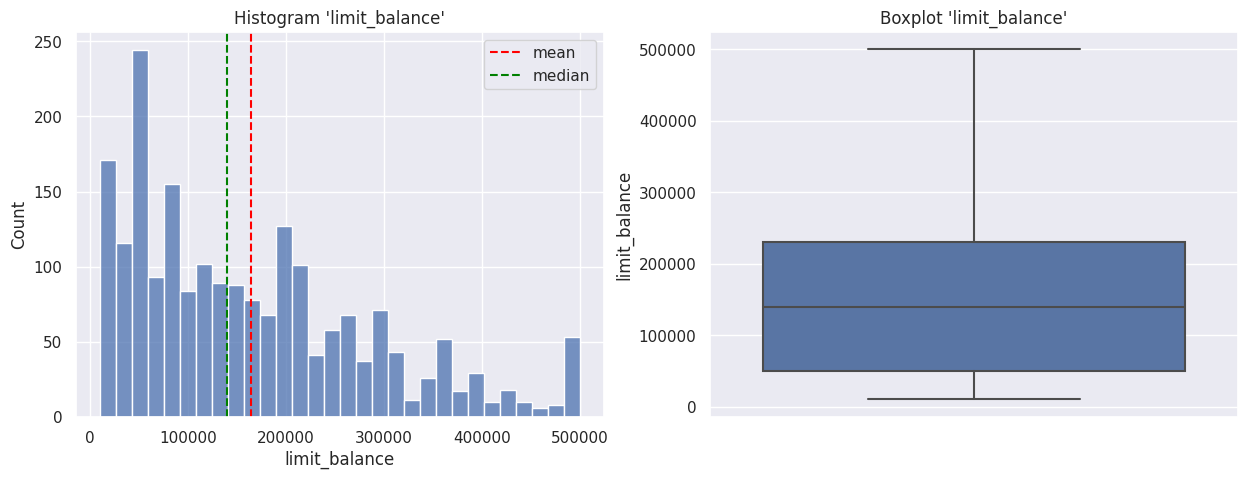

limit_balance Kurtosis: 0.07188972834765561
limit_balance Skewness: 0.8703460165161226
Columns 'limit_balance' right skewed


In [52]:
# plot setelah dilakukan capping
plot_dist(df_train, df_col[0])

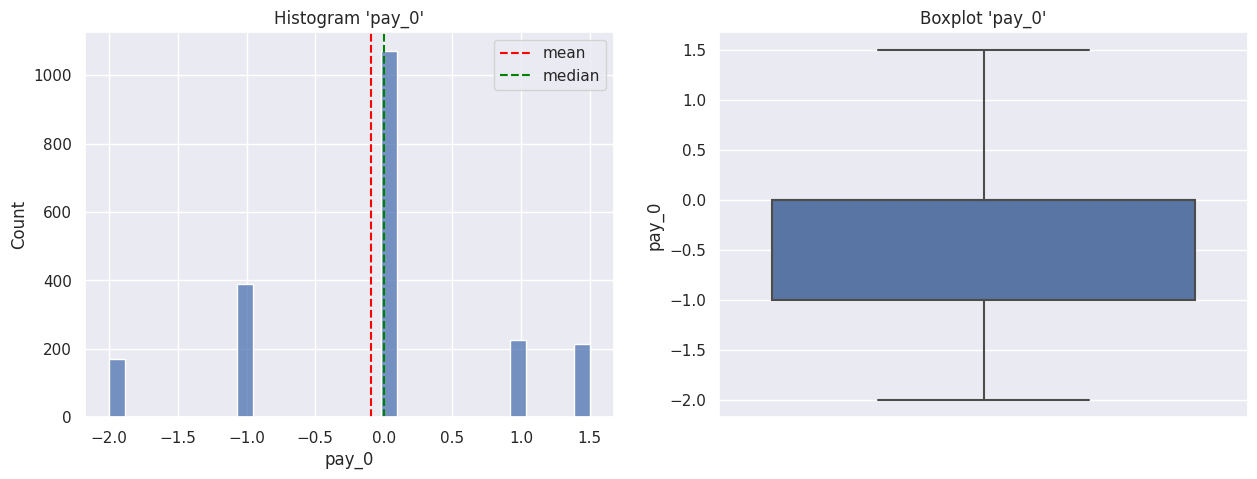

pay_0 Kurtosis: -0.18247378643286627
pay_0 Skewness: -0.2063651018416352
Columns 'pay_0' normal distribution


In [53]:
# plot setelah dilakukan capping
plot_dist(df_train, df_col[1])

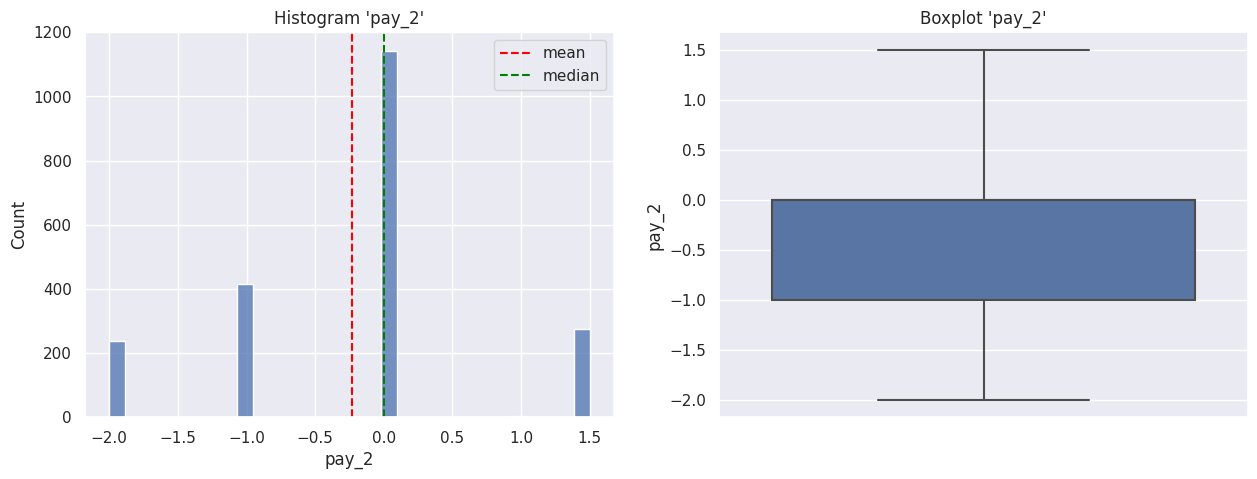

pay_2 Kurtosis: -0.08779152417283953
pay_2 Skewness: -0.039608876712534366
Columns 'pay_2' normal distribution


In [54]:
# plot setelah dilakukan capping
plot_dist(df_train, df_col[2])

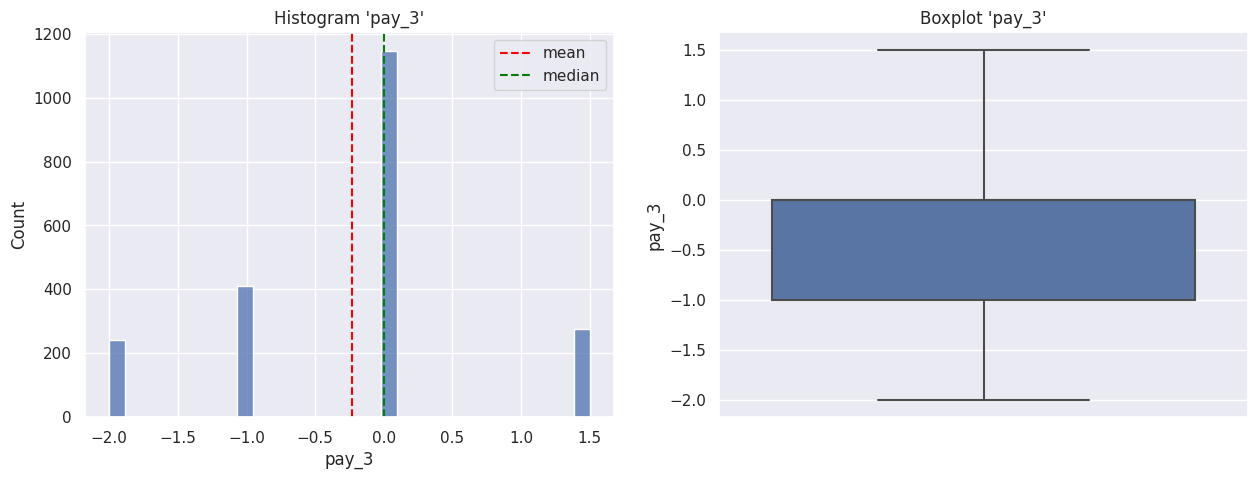

pay_3 Kurtosis: -0.08498202601603388
pay_3 Skewness: -0.04281755824141189
Columns 'pay_3' normal distribution


In [55]:
# plot setelah dilakukan capping
plot_dist(df_train, df_col[3])

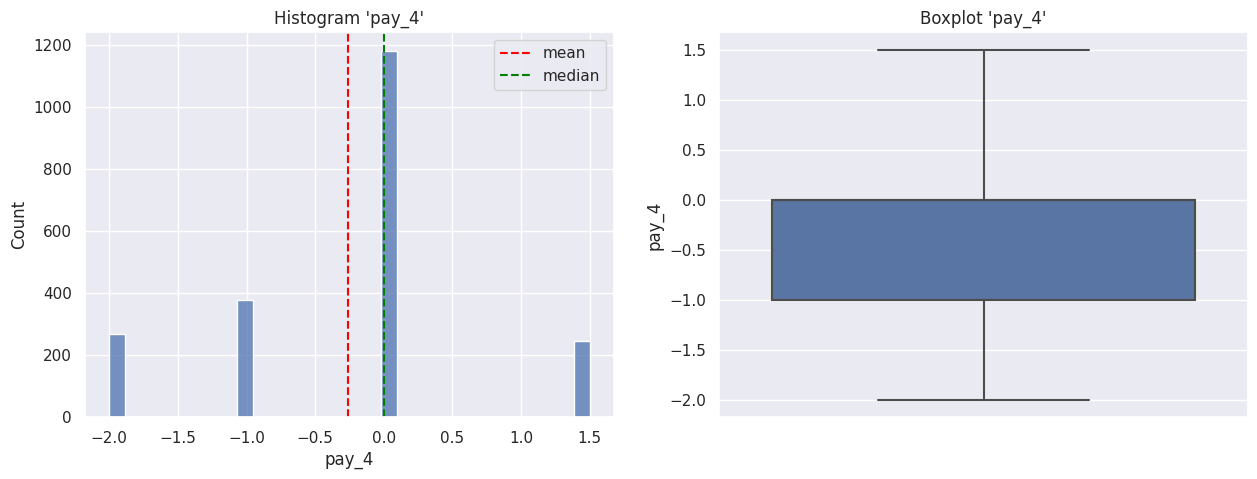

pay_4 Kurtosis: -0.04124652349477209
pay_4 Skewness: -0.10447710024511984
Columns 'pay_4' normal distribution


In [56]:
# plot setelah dilakukan capping
plot_dist(df_train, df_col[4])

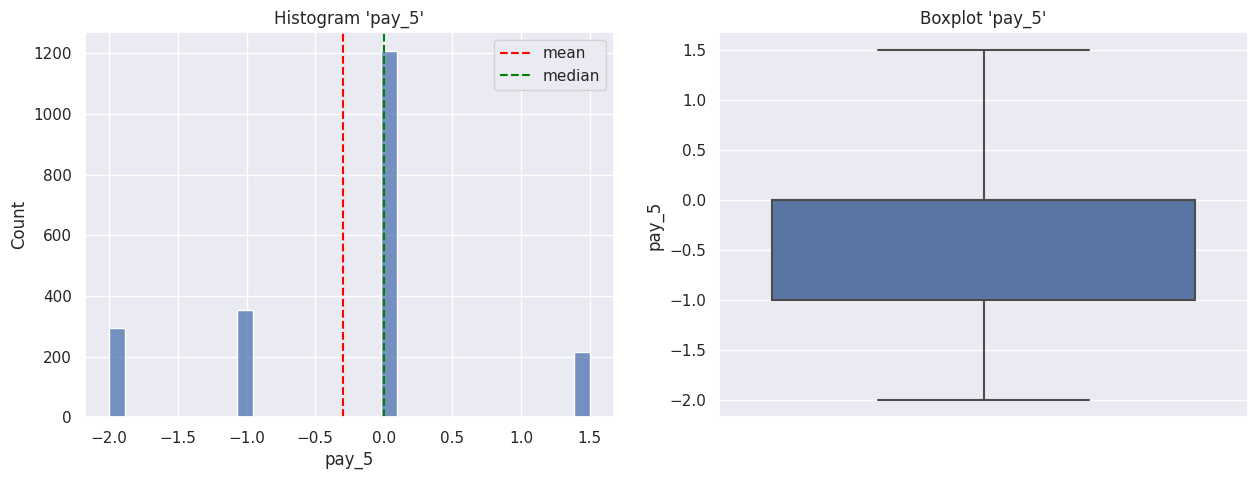

pay_5 Kurtosis: -0.022718220715865822
pay_5 Skewness: -0.1648435000253389
Columns 'pay_5' normal distribution


In [57]:
# plot setelah dilakukan capping
plot_dist(df_train, df_col[5])

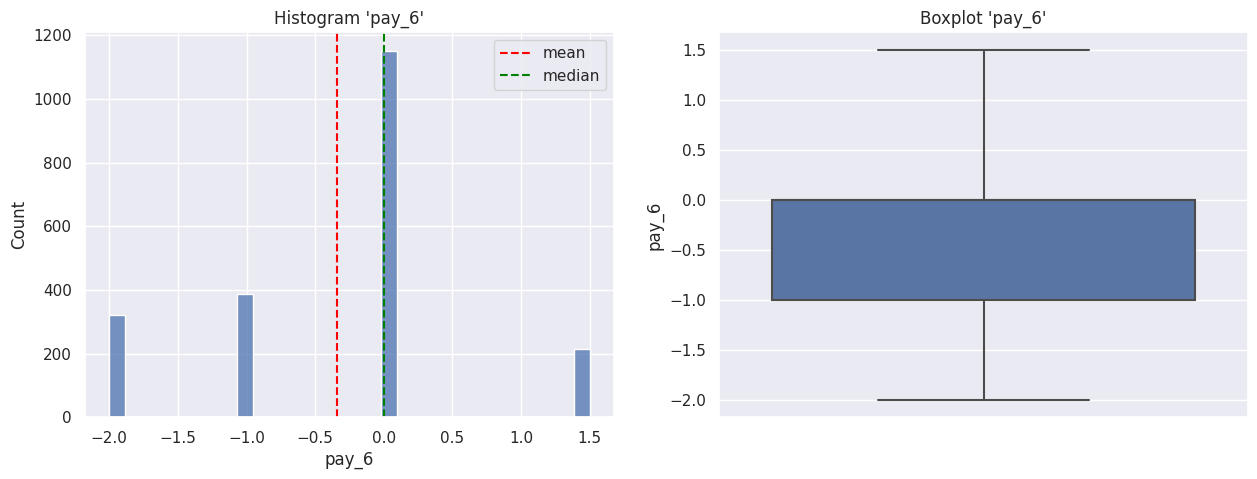

pay_6 Kurtosis: -0.1679708313088053
pay_6 Skewness: -0.10554931984993048
Columns 'pay_6' normal distribution


In [58]:
# plot setelah dilakukan capping
plot_dist(df_train, df_col[6])

Dalam handling outlier menggunakan winsorized maka semua kolom yang semula terdapat outlier jadi tidak ada outlier.

# Preprocess

Pada tahap ini saya membuat fungsi pipeline.

**Outlier & Scaling**

- Untuk outlier saya menggunakan winsorizer
- Untuk scaling, saya melakukan pada fitur data numerik dengan StandardScaler
- Saya tidak menggunakan encoding karena data kategorikal sudah dalam encode.

In [59]:
# membuat variabel berisi fungsi pipeline
num_pipeline = Pipeline([
        ('outlier', Winsorizer(capping_method='gaussian', tail='both')),
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

num_tr = num_pipeline.fit_transform(X_train[['limit_balance', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']])

In [60]:
# pipeline untuk X_test
test_tr = num_pipeline.transform(X_test)
test_tr

array([[-0.52173524,  0.01840407,  0.1257457 , ..., -0.73842696,
        -0.70899149, -0.65918486],
       [-0.68447014, -1.85821538, -1.64836704, ..., -1.64886624,
        -1.63439042, -0.65918486],
       [-0.7658376 ,  1.89502353,  0.1257457 , ...,  0.17201232,
         0.21640744,  0.25765446],
       ...,
       [ 0.04783694,  0.01840407,  0.1257457 , ...,  0.17201232,
         0.21640744,  0.25765446],
       [-0.92857251,  0.01840407,  0.1257457 , ...,  0.17201232,
         0.21640744,  0.25765446],
       [ 1.10561385,  0.01840407,  0.1257457 , ...,  0.17201232,
         0.21640744,  0.25765446]])

# Model Definition

Model yang akan saya gunakan adalah Logistic Regression, SVM, Decision Tree, Random Forest, KNN, Naive Bayes, dan Gradient Boosting Machines (GBM). Sesuai kriteria Milestone 1, saya akan melakukan training data pada semua model terlebih dahulu dengan parameter default menggunakan cross validation. Kemudian akan mendapatkan model terbaik dan dilakukan hyperparameter tuning, dan terakhir mengevaluasi performa sebelum dan sesudah melakukan tuning pada model tersebut.

In [61]:
# instansiasi model
log_model = LogisticRegression(random_state=42)
svm_model = SVC(random_state=42)
tree_model = DecisionTreeClassifier(random_state=42)
rnd_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
gbm_model = GradientBoostingClassifier(random_state=42)

# Model Training

Confusion Matrix dibagi menjadi 4 bagian, yaitu true positif, false positif, false negatif, dan true negatif. Sumbu Y dari confusion matrix adalah true label, sedangkan sumbu X dari confusion matrix adalah hasil prediksi kelas.

- True positif adalah label positif atau dalam hal ini label 0 berarti seseorang itu bayar dan terbaca bayar
- False positif adalah seseorang bayar namun terbaca tidak bayar
- True negatif adalah seseorang tidak bayar dan terbaca tidak bayar.
- False negatif adalah seseorang tidak bayar namun terbaca bayar.

0 itu bayar (+)

1 itu tidak bayar (-)

- True positif (0-0) terbayar dan terbaca bayar
- False Negatif (1-0) tidak bayar dan terbaca bayar
- False Positif (0-1) bayar dan terbaca tidak bayar
-

- pake recall karena melihat orang yang tidak bayar tapi terbaca bayar dan itu masuk ke False Negatif

In [62]:
from sklearn.metrics import classification_report

### LogisticRegression

In [63]:
log_model.fit(num_tr, y_train)

lr_train = log_model.predict(num_tr)
lr_test = log_model.predict(test_tr)

print(classification_report(y_train, lr_train))
print(classification_report(y_test, lr_test))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1630
           1       0.78      0.36      0.49       444

    accuracy                           0.84      2074
   macro avg       0.81      0.66      0.70      2074
weighted avg       0.83      0.84      0.82      2074

              precision    recall  f1-score   support

           0       0.84      0.96      0.89       699
           1       0.69      0.32      0.44       191

    accuracy                           0.82       890
   macro avg       0.76      0.64      0.67       890
weighted avg       0.81      0.82      0.80       890



- Accuracy adalah jumlah titik data yang diprediksi dengan benar dari semua titik data.
- Precision adalah rasio pengamatan positif yang diprediksi dengan benar terhadap total pengamatan positif yang diprediksi.
- Recall adalah rasio pengamatan positif yang diprediksi dengan benar terhadap semua pengamatan di kelas yang sebenarnya
- F1-score adalah rata-rata tertimbang dari Precision dan Recall.

---
Lalu metrik yang akan saya gunakan adalah recall karena melihat orang yang tidak bayar tapi terbaca bayar dan itu masuk ke False Negatif.


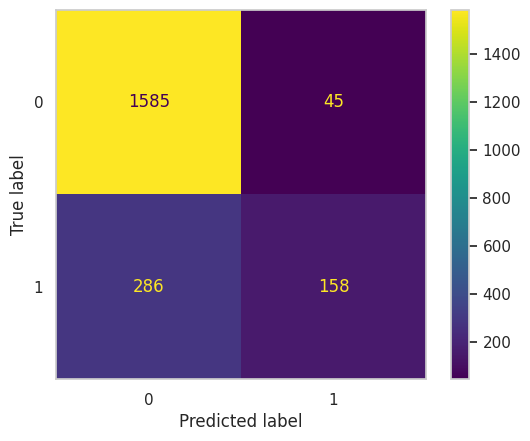

In [64]:
#confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_train, lr_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

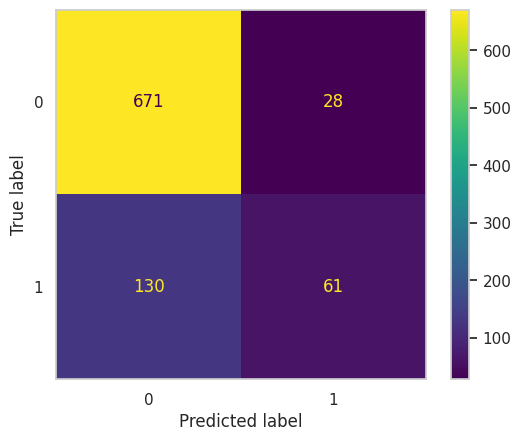

In [65]:
#confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_test, lr_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

Confusion Matrix dibagi menjadi 4 bagian, yaitu true positif, false positif, false negatif, dan true negatif. Sumbu Y dari confusion matrix adalah true label, sedangkan sumbu X dari confusion matrix adalah hasil prediksi kelas.

True positif adalah label positif atau dalam hal ini label 0 berarti seseorang itu bayar dan terbaca bayar. Kemudian false positif adalah seseorang bayar namun terbaca tidak bayar. Kemudian true negatif adalah seseorang tidak bayar dan terbaca tidak bayar. Kemudian negatif false adalah seseorang tidak bayar namun terbaca bayar.

### SVC Model

In [66]:
svm_model.fit(num_tr, y_train)

lr_train = svm_model.predict(num_tr)
lr_test = svm_model.predict(test_tr)

print(classification_report(y_train, lr_train))
print(classification_report(y_test, lr_test))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1630
           1       0.77      0.45      0.57       444

    accuracy                           0.85      2074
   macro avg       0.82      0.71      0.74      2074
weighted avg       0.84      0.85      0.84      2074

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       699
           1       0.67      0.40      0.50       191

    accuracy                           0.83       890
   macro avg       0.76      0.67      0.70       890
weighted avg       0.81      0.83      0.81       890



Interpretasi yang dapat diperoleh dari data test model svm adalah :

- Precision : dari semua orang yang diprediksi bayar adalah 0.85 sedangkan dari orang yang diprediksi tidak bayar adalah 0.67.
- Recall : dari semua orang yang diprediksi bayar adalah 0.95 sedangkan dari orang yang diprediksi tidak bayar adalah 0.40
- F1-score : dari semua orang yang diprediksi bayar adalah 0.90 sedangkan dari orang yang diprediksi tidak bayar adalah 0.50

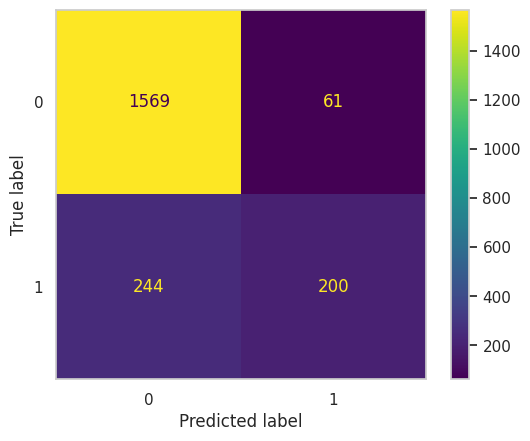

In [67]:
#confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_train, lr_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

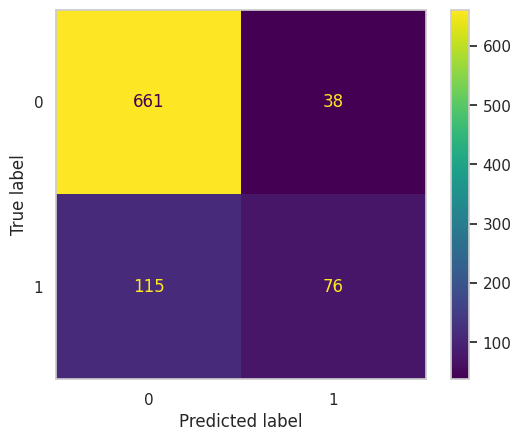

In [68]:
#confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_test, lr_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

Berdasarkan model SVM yang telah dibuat pada test, diperoleh confusion matrix yang menyatakan bahwa terdapat 661 data yang di prediksi secara True Positiv, 38 True Negatif, 115 data False Positif, 76 data False Negatif.

### DecisionTreeClassifier Model

In [69]:
tree_model.fit(num_tr, y_train)

lr_train = tree_model.predict(num_tr)
lr_test = tree_model.predict(test_tr)

print(classification_report(y_train, lr_train))
print(classification_report(y_test, lr_test))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1630
           1       0.97      0.66      0.78       444

    accuracy                           0.92      2074
   macro avg       0.94      0.82      0.87      2074
weighted avg       0.93      0.92      0.92      2074

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       699
           1       0.45      0.37      0.41       191

    accuracy                           0.77       890
   macro avg       0.65      0.62      0.63       890
weighted avg       0.75      0.77      0.76       890



Interpretasi yang dapat diperoleh dari data test model DecisionTree adalah :

- Precision : dari semua orang yang diprediksi bayar adalah 0.84 sedangkan dari orang yang diprediksi tidak bayar adalah 0.45.
- Recall : dari semua orang yang diprediksi bayar adalah 0.88 sedangkan dari orang yang diprediksi tidak bayar adalah 0.37
- F1-score : dari semua orang yang diprediksi bayar adalah 0.86 sedangkan dari orang yang diprediksi tidak bayar adalah 0.41

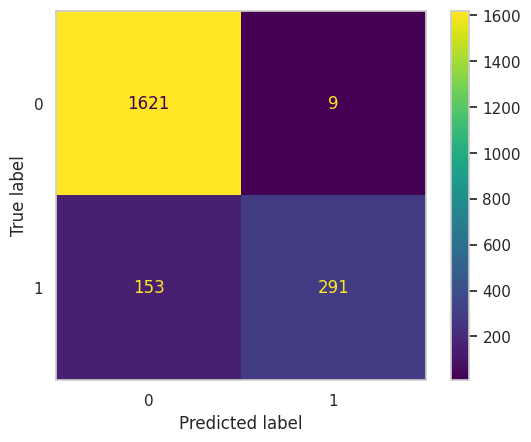

In [70]:
#confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_train, lr_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

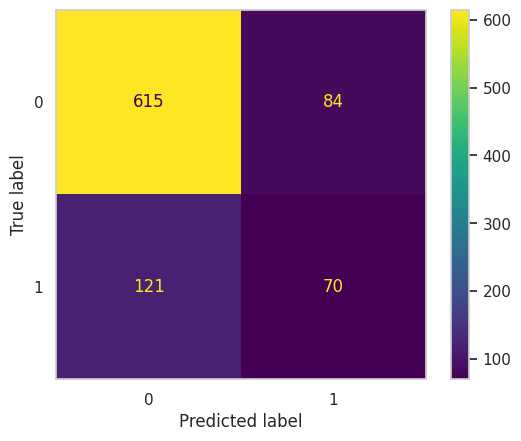

In [71]:
#confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_test, lr_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

Berdasarkan model DecisionTree yang telah dibuat pada test, diperoleh confusion matrix yang menyatakan bahwa terdapat 615 data yang di prediksi secara True Positiv, 84 True Negatif, 121 data False Positif, 70 data False Negatif.

### RandomForestClassifier Model

In [72]:
rnd_model.fit(num_tr, y_train)

lr_train = rnd_model.predict(num_tr)
lr_test = rnd_model.predict(test_tr)

print(classification_report(y_train, lr_train))
print(classification_report(y_test, lr_test))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1630
           1       0.92      0.69      0.79       444

    accuracy                           0.92      2074
   macro avg       0.92      0.84      0.87      2074
weighted avg       0.92      0.92      0.92      2074

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       699
           1       0.50      0.38      0.43       191

    accuracy                           0.78       890
   macro avg       0.67      0.64      0.65       890
weighted avg       0.77      0.78      0.77       890



Interpretasi yang dapat diperoleh dari data test model RandomForest adalah :

- Precision : dari semua orang yang diprediksi bayar adalah 0.84 sedangkan dari orang yang diprediksi tidak bayar adalah 0.50
- Recall : dari semua orang yang diprediksi bayar adalah 0.89 sedangkan dari orang yang diprediksi tidak bayar adalah 0.38
- F1-score : dari semua orang yang diprediksi bayar adalah 0.87 sedangkan dari orang yang diprediksi tidak bayar adalah 0.43

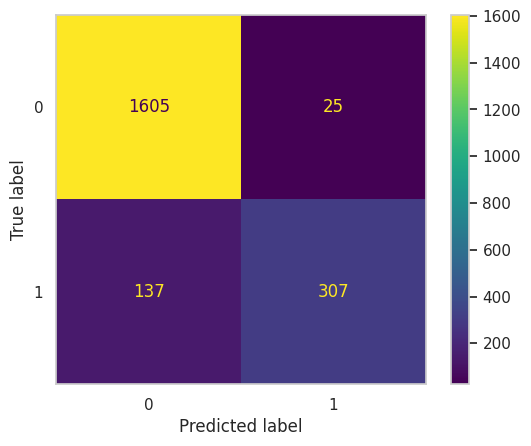

In [73]:
#confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_train, lr_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

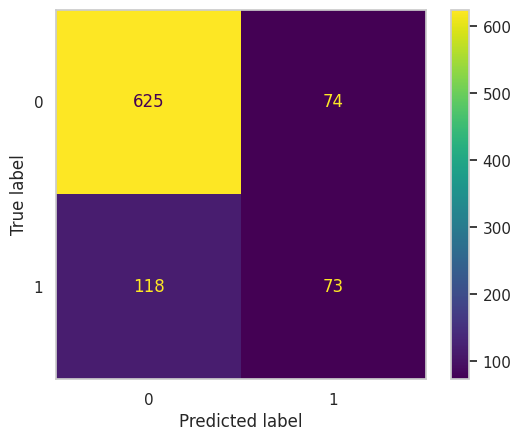

In [74]:
#confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_test, lr_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

Berdasarkan model Random Forest yang telah dibuat pada test, diperoleh confusion matrix yang menyatakan bahwa terdapat 625 data yang di prediksi secara True Positiv, 74 True Negatif, 118 data False Positif, 73 data False Negatif.

### KNeighborsClassifier Model

In [75]:
knn_model.fit(num_tr, y_train)

lr_train = knn_model.predict(num_tr)
lr_test = knn_model.predict(test_tr)

print(classification_report(y_train, lr_train))
print(classification_report(y_test, lr_test))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1630
           1       0.78      0.45      0.57       444

    accuracy                           0.85      2074
   macro avg       0.82      0.71      0.74      2074
weighted avg       0.85      0.85      0.84      2074

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       699
           1       0.61      0.38      0.47       191

    accuracy                           0.81       890
   macro avg       0.73      0.66      0.68       890
weighted avg       0.80      0.81      0.80       890



Interpretasi yang dapat diperoleh dari data test model KNN adalah :

- Precision : dari semua orang yang diprediksi bayar adalah 0.85 sedangkan dari orang yang diprediksi tidak bayar adalah 0.61
- Recall : dari semua orang yang diprediksi bayar adalah 0.93 sedangkan dari orang yang diprediksi tidak bayar adalah 0.38
- F1-score : dari semua orang yang diprediksi bayar adalah 0.89 sedangkan dari orang yang diprediksi tidak bayar adalah 0.47

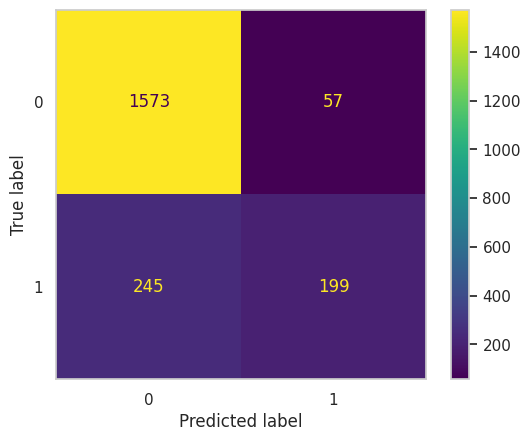

In [76]:
#confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_train, lr_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

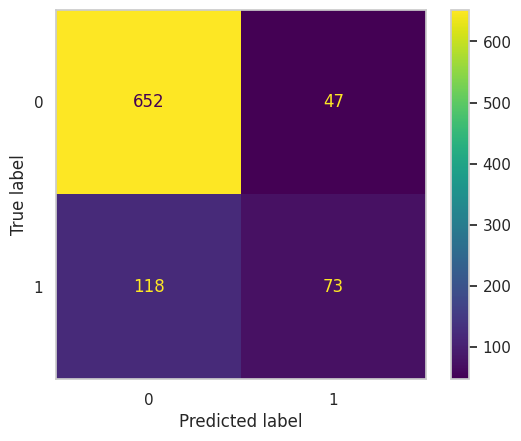

In [77]:
#confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_test, lr_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

Berdasarkan model KNN yang telah dibuat pada test, diperoleh confusion matrix yang menyatakan bahwa terdapat 652 data yang di prediksi secara True Positiv, 47 True Negatif, 118 data False Positif, 73 data False Negatif.

### GaussianNB Model

In [78]:
nb_model.fit(num_tr, y_train)

lr_train = nb_model.predict(num_tr)
lr_test = nb_model.predict(test_tr)

print(classification_report(y_train, lr_train))
print(classification_report(y_test, lr_test))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1630
           1       0.58      0.46      0.52       444

    accuracy                           0.81      2074
   macro avg       0.72      0.69      0.70      2074
weighted avg       0.80      0.81      0.81      2074

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       699
           1       0.52      0.47      0.49       191

    accuracy                           0.79       890
   macro avg       0.69      0.68      0.68       890
weighted avg       0.79      0.79      0.79       890



Interpretasi yang dapat diperoleh dari data test model Gaussian NB adalah :

- Precision : dari semua orang yang diprediksi bayar adalah 0.86 sedangkan dari orang yang diprediksi tidak bayar adalah 0.52
- Recall : dari semua orang yang diprediksi bayar adalah 0.88 sedangkan dari orang yang diprediksi tidak bayar adalah 0.47
- F1-score : dari semua orang yang diprediksi bayar adalah 0.87 sedangkan dari orang yang diprediksi tidak bayar adalah 0.49

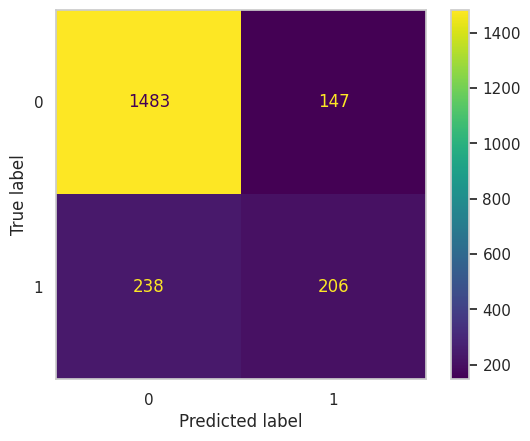

In [79]:
#confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_train, lr_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

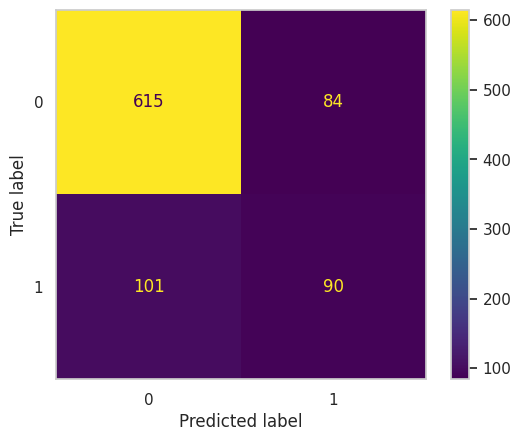

In [80]:
#confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_test, lr_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

Berdasarkan model Gaussian NB yang telah dibuat pada test, diperoleh confusion matrix yang menyatakan bahwa terdapat 615 data yang di prediksi secara True Positiv, 84 True Negatif, 101 data False Positif, 90 data False Negatif.

### GradientBoostingClassifier Model

In [81]:
gbm_model.fit(num_tr, y_train)

lr_train = gbm_model.predict(num_tr)
lr_test = gbm_model.predict(test_tr)

print(classification_report(y_train, lr_train))
print(classification_report(y_test, lr_test))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1630
           1       0.81      0.48      0.60       444

    accuracy                           0.86      2074
   macro avg       0.84      0.72      0.76      2074
weighted avg       0.86      0.86      0.85      2074

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       699
           1       0.63      0.38      0.48       191

    accuracy                           0.82       890
   macro avg       0.74      0.66      0.68       890
weighted avg       0.80      0.82      0.80       890



Interpretasi yang dapat diperoleh dari data test model Gradient Boosting adalah :

- Precision : dari semua orang yang diprediksi bayar adalah 0.85 sedangkan dari orang yang diprediksi tidak bayar adalah 0.63
- Recall : dari semua orang yang diprediksi bayar adalah 0.94 sedangkan dari orang yang diprediksi tidak bayar adalah 0.38
- F1-score : dari semua orang yang diprediksi bayar adalah 0.89 sedangkan dari orang yang diprediksi tidak bayar adalah 0.48

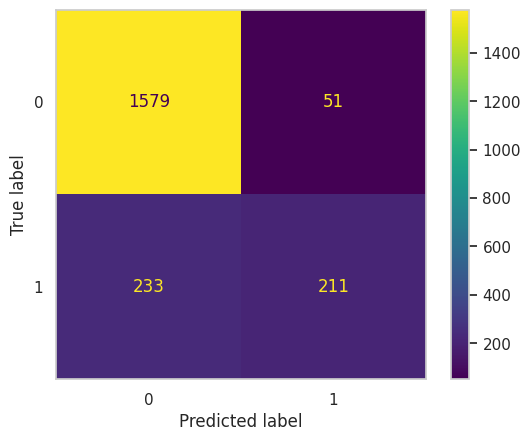

In [82]:
#confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_train, lr_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

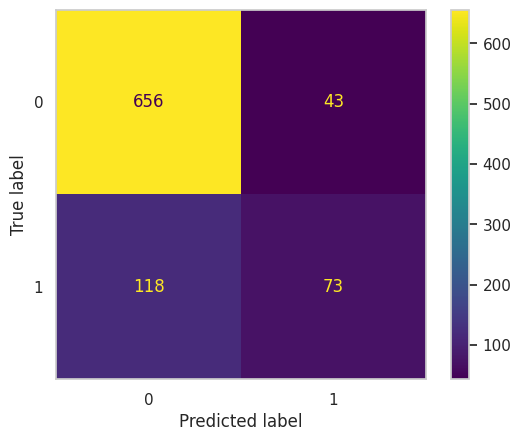

In [83]:
#confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_test, lr_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

Berdasarkan model Gradient Boosting yang telah dibuat pada test, diperoleh confusion matrix yang menyatakan bahwa terdapat 656 data yang di prediksi secara True Positiv, 43 True Negatif, 118 data False Positif, 73 data False Negatif.

## Cross Validation

Train data dengan pipeline num_pipeline + model yang di cross validate dengan metode cross_vall_score. Untuk metrik evaluasi model, saya menggunakan recall dengan pertimbangan meminimalkan angka False Negative dimana dengan konteks 'karena melihat orang yang tidak bayar tapi terbaca bayar'

In [84]:
#Cross-validation Logreg
logreg_pipe = Pipeline([
        ('preprocess', num_pipeline),
        ('model', LogisticRegression(random_state=42))
    ])
scores_logreg = cross_val_score(logreg_pipe, X_train, y_train,
                         scoring="recall", cv=10)

#Cross-validation SVM
svm_pipe = Pipeline([
        ('preprocess', num_pipeline),
        ('model', SVC(random_state=42))
    ])
scores_svm = cross_val_score(svm_pipe, X_train, y_train,
                         scoring="recall", cv=10)

#Cross-validation DecisionTreeClassifier
tree_pipe = Pipeline([
        ('preprocess', num_pipeline),
        ('model', DecisionTreeClassifier(random_state=42))
    ])
scores_tree = cross_val_score(tree_pipe, X_train, y_train,
                         scoring="recall", cv=10)

#Cross-validation RandomForestClassifier
rnd_pipe = Pipeline([
        ('preprocess', num_pipeline),
        ('model', RandomForestClassifier(random_state=42))
    ])
scores_rnd = cross_val_score(rnd_pipe, X_train, y_train,
                         scoring="recall", cv=10)

#Cross-validation KNeighborsClassifier
knn_pipe = Pipeline([
        ('preprocess', num_pipeline),
        ('model', KNeighborsClassifier())
    ])
scores_knn = cross_val_score(knn_pipe, X_train, y_train,
                         scoring="recall", cv=10)

#Cross-validation GaussianNB
nb_pipe = Pipeline([
        ('preprocess', num_pipeline),
        ('model', GaussianNB())
    ])
scores_nb = cross_val_score(nb_pipe, X_train, y_train,
                         scoring="recall", cv=10)

#Cross-validation GradientBoostingClassifier
gbm_pipe = Pipeline([
        ('preprocess', num_pipeline),
        ('model', GradientBoostingClassifier(random_state=42))
    ])
scores_gbm = cross_val_score(gbm_pipe, X_train, y_train,
                         scoring="recall", cv=10)

In [85]:
nama_model = []
cv_scores=0
for cv,name in zip([scores_logreg, scores_svm, scores_tree, scores_rnd, scores_knn, scores_nb, scores_gbm],
    ['log_model','svm_model', 'tree_model', 'rnd_model', 'knn_model', 'nb_model', 'gbm_model']):
    print(name)
    print('All - Cross Validation  : ', cv)
    print('Mean - Cross Validation : ', cv.mean())
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        nama_model = name
    else:
        pass
print('best model:', nama_model)
print('cross-val mean:', cv_scores)

log_model
All - Cross Validation  :  [0.42222222 0.28888889 0.33333333 0.35555556 0.43181818 0.31818182
 0.38636364 0.29545455 0.31818182 0.36363636]
Mean - Cross Validation :  0.35136363636363643
--------------------------------------------------
svm_model
All - Cross Validation  :  [0.51111111 0.4        0.35555556 0.48888889 0.5        0.38636364
 0.43181818 0.40909091 0.34090909 0.40909091]
Mean - Cross Validation :  0.4232828282828283
--------------------------------------------------
tree_model
All - Cross Validation  :  [0.48888889 0.46666667 0.35555556 0.44444444 0.40909091 0.45454545
 0.29545455 0.38636364 0.38636364 0.36363636]
Mean - Cross Validation :  0.4051010101010101
--------------------------------------------------
rnd_model
All - Cross Validation  :  [0.53333333 0.37777778 0.35555556 0.46666667 0.45454545 0.40909091
 0.31818182 0.40909091 0.31818182 0.45454545]
Mean - Cross Validation :  0.40969696969696967
--------------------------------------------------
knn_model

Hasil dari evaluasi dengan cross val score menunjukkan bahwa model naive bayes adalah model terbaik dengan nilai mean dari recall sebesar 0.46.

## Hyperparameter Tuning

Dari model terbaik yang sudah diketahui yaitu Naive Bayes, saya akan melakukan tuning hyperparameter terhadap model tersebut untuk memaksimalkan scoring untuk mendapatkan model yang optimal. Saya akan mencoba membandingkan antara gridsearch dan randomized.

### GridSearch

In [86]:
params = {'priors': [None], 'var_smoothing': [1e-9, 1e-8, 1e-7]}

nb = GaussianNB()

grid_search = GridSearchCV(nb, params, cv=5,
                           scoring='recall',
                           return_train_score=True)
grid_search.fit(num_tr, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'priors': [None],
                         'var_smoothing': [1e-09, 1e-08, 1e-07]},
             return_train_score=True, scoring='recall')

In [87]:
pd.DataFrame(grid_search.cv_results_).shape

(3, 22)

In [88]:
grid_search.best_params_

{'priors': None, 'var_smoothing': 1e-09}

In [89]:
grid_search.best_score_

0.47063329928498465

Dari tuning diatas, Naive Bayes ketika dilakukan prediksi terhadap train mendapatkan skor 0.47.

In [90]:
model = grid_search.best_estimator_

model.fit(num_tr, y_train)

model_train = model.predict(num_tr)
model_test = model.predict(test_tr)

print(classification_report(y_train, model_train))
print(classification_report(y_test, model_test))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1630
           1       0.58      0.46      0.52       444

    accuracy                           0.81      2074
   macro avg       0.72      0.69      0.70      2074
weighted avg       0.80      0.81      0.81      2074

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       699
           1       0.52      0.47      0.49       191

    accuracy                           0.79       890
   macro avg       0.69      0.68      0.68       890
weighted avg       0.79      0.79      0.79       890



In [91]:
all_process = Pipeline([
    ("preprocess", num_pipeline),
    ("classification", model)
])

all_process.fit(X_train, y_train)
hasil = all_process.predict(X_test)

print(classification_report(y_test, hasil))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       699
           1       0.52      0.47      0.49       191

    accuracy                           0.79       890
   macro avg       0.69      0.68      0.68       890
weighted avg       0.79      0.79      0.79       890



### Randomized

In [92]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

params = {'priors': [None], 'var_smoothing': uniform(1e-9, 1e-7)}

nb = GaussianNB()

randomized_search = RandomizedSearchCV(nb, params, cv=5,
                                      scoring='recall',
                                      return_train_score=True,
                                      n_iter=3,
                                      random_state=42)
randomized_search.fit(num_tr, y_train)

RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_iter=3,
                   param_distributions={'priors': [None],
                                        'var_smoothing': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fb174d4f220>},
                   random_state=42, return_train_score=True, scoring='recall')

In [93]:
pd.DataFrame(randomized_search.cv_results_).shape

(3, 22)

In [94]:
randomized_search.best_params_

{'priors': None, 'var_smoothing': 3.845401188473625e-08}

In [95]:
randomized_search.best_score_

0.47063329928498465

Dari tuning diatas, Naive Bayes ketika dilakukan prediksi terhadap train mendapatkan skor 0.47.

In [96]:
model = randomized_search.best_estimator_

model.fit(num_tr, y_train)

model_train = model.predict(num_tr)
model_test = model.predict(test_tr)

print(classification_report(y_train, model_train))
print(classification_report(y_test, model_test))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1630
           1       0.58      0.46      0.52       444

    accuracy                           0.81      2074
   macro avg       0.72      0.69      0.70      2074
weighted avg       0.80      0.81      0.81      2074

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       699
           1       0.52      0.47      0.49       191

    accuracy                           0.79       890
   macro avg       0.69      0.68      0.68       890
weighted avg       0.79      0.79      0.79       890



In [97]:
all_process = Pipeline([
    ("preprocess", num_pipeline),
    ("classification", model)
])

all_process.fit(X_train, y_train)
hasil = all_process.predict(X_test)

print(classification_report(y_test, hasil))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       699
           1       0.52      0.47      0.49       191

    accuracy                           0.79       890
   macro avg       0.69      0.68      0.68       890
weighted avg       0.79      0.79      0.79       890



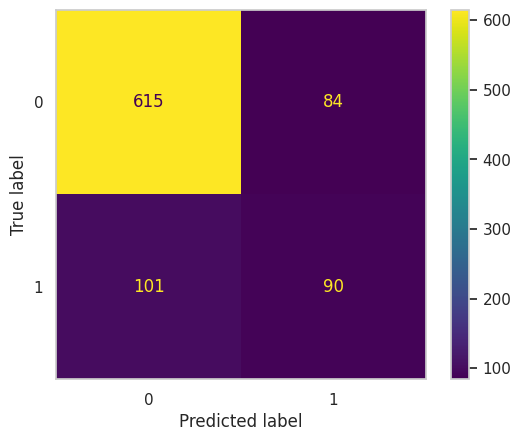

In [98]:
# gaussian nb confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_test, hasil)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

Hasil true positive sebanyak 615, false positive sebanyak 101, false negative sebanyak 90, dan true negative sebanyak 84.

# Model Saving

In [99]:
# Save Model
with open('nb_randcv.pkl','wb') as file_1:
    joblib.dump(grid_search,file_1)

# Conceptual Problem

1. Apa yang dimaksud dengan criterion pada Decision Tree ? Jelaskan criterion yang kalian pakai dalam kasus ini !
> Criterion adalah metrik yang digunakan untuk mengevaluasi kualitas pembagian (split) dalam model berbasis pohon (tree-based model). Dalam kasus ini, Decision Tree bukanlah model terbaik. Namun, dalam decision tree, criterion yang umumnya digunakan adalah 'entropy', yang menghitung log loss untuk meminimalkan kerugian informasi. Namun, secara default, sklearn menggunakan criterion 'gini', di mana gini impurity adalah probabilitas elemen yang akan salah diklasifikasikan jika dilakukan pelabelan secara acak. Semakin rendah gini impurity, semakin "murni" set elemen tersebut. Dalam konteks decision tree, tujuannya adalah meminimalkan nilai gini impurity agar leaf node terakhir menjadi yang paling murni.
2. Jelaskan apa yang dimaksud dengan pruning pada Tree-based model (alasan, definisi, jenis, dll) !
> Pruning adalah proses penghapusan atau pengurangan cabang-cabang (subtrees) pada model berbasis phon (tree-based model) untuk meningkatkan kinerja generalisasi dan menghindari overfitting. Pruning ini bertujuan untuk menyederhanakan struktur pohon dengan menghapus cabang-cabang yang kurang informatif atau yang berpotensi menyebabkan overfitting pada data pelatihan.
> Alasan pruning adalah unutk mencegah overfitting dengan mengurangi kompleksitas pohon dan menghindari pencocokan yang terlalu spesifik terhadpa data pelatihan. Ini memungkinkan model untuk lebih umum dan memiliki kinerja yang lebih baik pada data baru. Selain itu untuk mengurangi kompleksitas model: pohon keputusan yang tidak dipangkas cenderung mrmiliki banyak cabang dan daun yang dapat membuat model sulit untuk di interpretasikan dan cenderung overfitting. Pruning membantu menyederhankan struktur pohon dengan menghilangkan cabang-cabang yang tidak pentign.
> Jenis pruning itu ada 2: Pre-Pruning: Pruning dilakukan selama proses pembangunan pohon. Pembentukan pohon berhenti sebelum mencapai titik di mana semua daun menjadi murni. Beberapa kriteria penghentian yang umum digunakan adalah membatasi kedalaman pohon, jumlah contoh minimum pada node, atau batasan gain informasi minimum. Post-Pruning: Pruning dilakukan setelah pembentukan pohon selesai. Pohon yang lengkap dibangun terlebih dahulu, dan kemudian cabang-cabang yang tidak memberikan peningkatan signifikan dalam kinerja pada data uji dihapus satu per satu. Teknik seperti Reduced Error Pruning (REP) atau Cost Complexity Pruning (CCP) digunakan dalam post-pruning.
3. Bagaimana cara memilih K yang optimal pada KNN ?
> Memilih K yang optimal pada KNN dapat dilakukan dengan Elbow Method dimana metode ini melibatkan plotting hubungan jumlah K dan SSE(Sum of Squared Error). Nilai optimal K ada pada titik Elbow nya dimana penurunan error titik selanjutnya sudah tidak terlalu signifikan lagi.
4. Jelaskan apa yang kalian ketahui tentang cross validation!
> Cross validation adalah teknik yang digunakan untuk mengevaluasi performa model machine learning dengan membagi data pelatihan secara seimbang sesuai dengan jumlah split yang ditentukan. Proses pelatihan akan dilakukan pada setiap potongan data sebagai data validasi atau "test" secara bergantian. Hal ini dilakukan hingga semua potongan data menjadi data validasi, dan nilai metrik evaluasi dari setiap iterasi akan diambil rata-ratanya sebagai hasil akhir evaluasi, yang disebut sebagai skor validasi silang atau cross validation score.
5. Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?
> - Akurasi adalah jumlah prediksi yang benar terhadap jumlah semua sample. Tepat dipakai saat jumlah kelasnya balance/seimbang
> - Precision adalah jumlah prediksi yang sungguh benar terhadap gabungan jumlah prediksi yang dianggap benar. Tepat dipakai saat ingin meminimalisir prediksi False Positif
> - Recall adalah jumlah prediksi yang sungguh benar terhadap gabungan jumlah prediksi yang seharusnya benar (prediksi salah padahal benar). Tepat dipakai saat ingin meminimalisir prediksi False Negatif
> - F1-Score adalah rata-rata harmonik atau keseimbangan dari precision dan recall. Tepat dipakai saat ingin mencari keseimbangan antara Precision dan Recall.





# Conclusion

- Berdasarkan analisis yang telah say alakukan, model Gaussian Naive Bayes merupakan best model terhadapt dataset ini
- Menurut saya, faktor yang bisa menentukan seseorang yang tidak bayar tapi terbaca bayar adalah limit_balance, pay_0 sampai pay_6
- Model yang digunkanan untuk memprediksi kemungkinan tersebut adalah model Naive Bayes dengan nilai recall 0.46
- Saya juga telah membuat model naive bayes dengan hyperparameter tuning, tetapi model tersebut memiliki kenaikan hanya mencapai 0.47. Hal ini dapat disebabkan oleh beberapa hal yaitu diantaranya kelas target yang tidak seimbang.
- Scoring recall pada kasus ini bertujuan untuk melihat orang yang tidak bayar tapi terbaca bayar


> Saran yang dapat saya berikan untuk proyek atau analisis tentang topik tersebut adalah :
> - Resampling data karena kelas target tidak seimbang. Metode yang dapat digunakan adalah SMOTE.
> - Buat prediksi menggunakan data yang tidak di skalakan juga unyuk mrlihat perbedaan yang lebih mendetail.